In [2]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt 
%matplotlib inline
dropout = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/dropout.xls")
pd.set_option('display.max_columns', 500)

In [3]:
print("\n Correlation between dropout rates at different stages of schooling\n")
dropout[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']].corr().style.background_gradient(cmap='RdBu')


 Correlation between dropout rates at different stages of schooling



,PRIMARY_TOTAL,UPPER_PRIMARY_TOTAL,SECONDARY_TOTAL,HRSECONDARY_TOTAL
PRIMARY_TOTAL,1.000000,0.786048,0.228586,-0.165536
UPPER_PRIMARY_TOTAL,0.786048,1.000000,0.471399,-0.084944
SECONDARY_TOTAL,0.228586,0.471399,1.000000,-0.063669
HRSECONDARY_TOTAL,-0.165536,-0.084944,-0.063669,1.000000


In [4]:
states=[]
for i in range(36):
    states.append(dropout.STATE_UT.iloc[3*i])
states=pd.DataFrame(states, columns=['State'])
dropout.drop(['STATE_UT','YEAR'],axis=1,inplace=True)
x=pd.DataFrame()
for i in range(36):
    x[i]=dropout.iloc[3*i+0:i*3+3,:].mean()
x=x.transpose()    

In [5]:
def create_clusters(x):

    scores=[]
    for i in range(4,36):
        k=KMeans(n_clusters=i,n_init=500, max_iter=500)
        k.fit(x[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']])
        label=KMeans.predict(k,x[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']])
        scores.append(silhouette_score(x, label))

    pd.DataFrame(scores).plot()
    best_cluster_no=np.argmax(scores[2:36])+2
    plt.axvline(best_cluster_no)
    plt.text(best_cluster_no, 0.34,s=f"Max silhoutte score at n={best_cluster_no}")
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte score")
    kk=KMeans(n_clusters=best_cluster_no)

    kk.fit(x[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']])
    lab = pd.DataFrame(kk.labels_,columns=['Labels'])
    result=pd.concat([states['State'],x,lab['Labels']],axis=1)
    return result

,PRIMARY_BOYS,PRIMARY_GIRLS,PRIMARY_TOTAL,UPPER_PRIMARY_BOYS,UPPER_PRIMARY_GIRLS,UPPER_PRIMARY_TOTAL,SECONDARY_BOYS,SECONDARY_GIRLS,SECONDARY_TOTAL,HRSECONDARY_BOYS,HRSECONDARY_GIRLS,HRSECONDARY_TOTAL
Labels,,,,,,,,,,,,
5,11.878333,11.090000,11.493333,8.618333,9.831667,9.230000,21.203333,20.201667,20.730000,15.030000,11.515000,13.341667
0,1.054444,0.640556,0.851111,1.462778,1.269444,1.148889,8.697778,6.648333,7.716111,15.424444,9.226667,12.514444
3,2.985238,2.767143,2.868571,3.578095,4.216667,3.724762,19.505714,19.058095,19.344762,9.989048,7.180476,8.588571
4,3.560278,3.564167,3.560833,2.321389,2.959444,2.469167,12.516111,11.215000,11.882500,3.686389,3.297500,3.454167
2,2.216667,1.985556,2.084444,3.525556,3.204444,3.210000,33.901111,33.630000,33.771111,2.826667,1.251111,1.921111
1,9.018333,8.378333,8.697778,7.843889,7.987778,7.912778,22.423333,22.893333,22.645000,1.611667,1.677222,1.475556


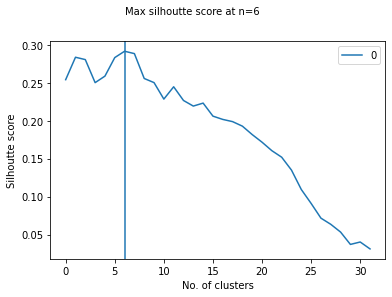

In [6]:
result=create_clusters(x)

result.groupby('Labels')[result.columns[1:-1]].agg('mean').sort_values([  'HRSECONDARY_TOTAL','SECONDARY_TOTAL','UPPER_PRIMARY_TOTAL','PRIMARY_TOTAL'], ascending=[False,False,False, False]).style.background_gradient(cmap="RdBu")

In [8]:
grouping=result[['State','Labels']]
clusters=pd.DataFrame()
for l in grouping.Labels.unique():
    clusters=pd.concat([clusters,pd.Series(np.array(grouping.State[grouping.Labels==l]), name=f"Cluster {l+1}").to_frame()],axis=1)
clusters.replace({np.nan:'-'},inplace=True)
clusters.sort_index(axis=1)    

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
0,A & N Islands,Assam,Bihar,Dadra & Nagar Haveli,Andhra Pradesh,Arunachal Pradesh
1,Chandigarh,Chhattisgarh,Karnataka,Daman & Diu,Haryana,Nagaland
2,Delhi,Jharkhand,Odisha,Gujarat,Kerala,-
3,Goa,Madhya Pradesh,-,Jammu & Kashmir,Lakshadweep,-
4,Himachal Pradesh,Meghalaya,-,Telangana,Maharashtra,-
5,Sikkim,Mizoram,-,Tripura,Manipur,-
6,-,-,-,West Bengal,Puducherry,-
7,-,-,-,-,Punjab,-
8,-,-,-,-,Rajasthan,-
9,-,-,-,-,Tamil Nadu,-
